### Thefts from vehicles are most common in the north-eastern San Francisco from 6 PM to 10 PM.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set(style='whitegrid')

We will be using the subset of the SFPD incident dataset for Summer 2014.

In [2]:
data = pd.read_csv('sanfrancisco_incidents_summer_2014.csv', parse_dates={'Datetime': ['Date', 'Time']})
data = data.rename(columns={
        'Descript': 'Description',
        'Y': 'Lat',
        'X': 'Lon',
        'IncidntNum': 'IncidentId',
    })
data = data.set_index(['IncidentId', 'PdId'])
data = data[['Datetime', 'Category', 'Description', 'Resolution', 'Lat', 'Lon', 'Address', 'PdDistrict']]
data = data.sort_values(by='Datetime')
display(data.head())
data['Hour'] = data.Datetime.map(lambda d: d.hour)
print('{} records'.format(len(data)))

Datetime        Category  \
IncidentId PdId                                                 
141017556  14101755671000 2014-06-01 00:01:00    NON-CRIMINAL   
150091383  15009138327195 2014-06-01 00:01:00        TRESPASS   
           15009138364070 2014-06-01 00:01:00  SUSPICIOUS OCC   
150099149  15009914906303 2014-06-01 00:01:00   LARCENY/THEFT   
140605461  14060546109027 2014-06-01 00:01:00  OTHER OFFENSES   

                                           Description Resolution        Lat  \
IncidentId PdId                                                                
141017556  14101755671000                LOST PROPERTY       NONE  37.783553   
150091383  15009138327195                  TRESPASSING       NONE  37.735578   
           15009138364070        SUSPICIOUS OCCURRENCE       NONE  37.735578   
150099149  15009914906303  PETTY THEFT FROM A BUILDING       NONE  37.719624   
140605461  14060546109027            FALSE PERSONATION       NONE  37.782951   

                                  Lon                      Address  PdDistrict  
IncidentId PdId                                                                 
141017556  14101755671000 -122.417645       600 Block of LARKIN ST    NORTHERN  
150091383  15009138327195 -122.452915  300 Block of CRESTAVISTA DR   INGLESIDE  
           15009138364070 -122.452915  300 Block of CRESTAVISTA DR   INGLESIDE  
150099149  15009914906303 -122.435324       500 Block of LISBON ST   INGLESIDE  
140605461  14060546109027 -122.413259         200 Block of TURK ST  TENDERLOIN

28993 records


Let's explore a particular kind of incidents—thefts from vehicles.

In [3]:
is_tfv = data.Description.str.contains(r'THEFT FROM\b.*\b(?:VEHICLE|AUTO)\b', regex=True)
tfv, other = data[is_tfv], data[~is_tfv]
print('{} theft-from-vehicle records'.format(len(tfv)))

5626 theft-from-vehicle records


Where do these incidents happen most often?

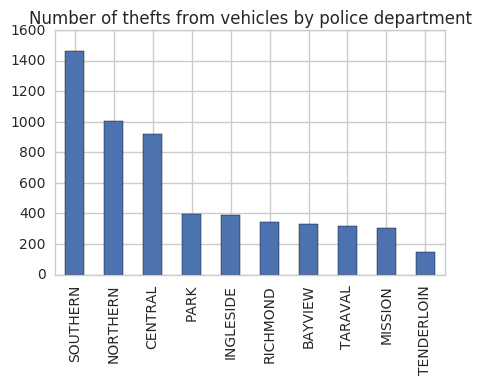

In [4]:
num_tfv_by_pd_district = tfv.PdDistrict.value_counts()

fig, ax = plt.subplots(figsize=(5, 4))
num_tfv_by_pd_district.plot.bar(ax=ax)
plt.title('Number of thefts from vehicles by police department')
plt.tight_layout()
plt.show()

There are 3 police depertment districts with substantially higher numbers of thefts from vehicles than in other districts.

Where are these 3 districts located on the map? They are marked with green on the following figure.

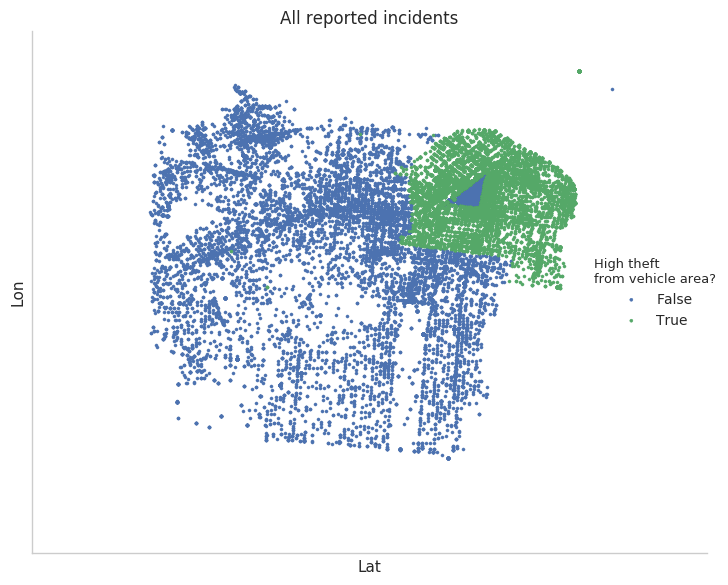

In [5]:
high_tfv_pd_districts = set(district for district, count in num_tfv_by_pd_district.items() if count > 900)
data['IsHighTfvPdDistrict'] = data.PdDistrict.map(lambda x: x in high_tfv_pd_districts)

g = sns.FacetGrid(data, hue='IsHighTfvPdDistrict', size=6)
g.map(plt.scatter, 'Lat', 'Lon', marker='.')
g.add_legend(title='High theft\nfrom vehicle area?')
g.set(xticks=[], yticks=[])
plt.title('All reported incidents')
plt.tight_layout()
plt.show()

All these 3 police department districts are adjacent and located in the north-east. They surround another district (Tenderloin) which, in fact, has the lowest number of thefts from vehicles.

How are thefts from vehicles and other incidents in these police districts distributed throughout the day?

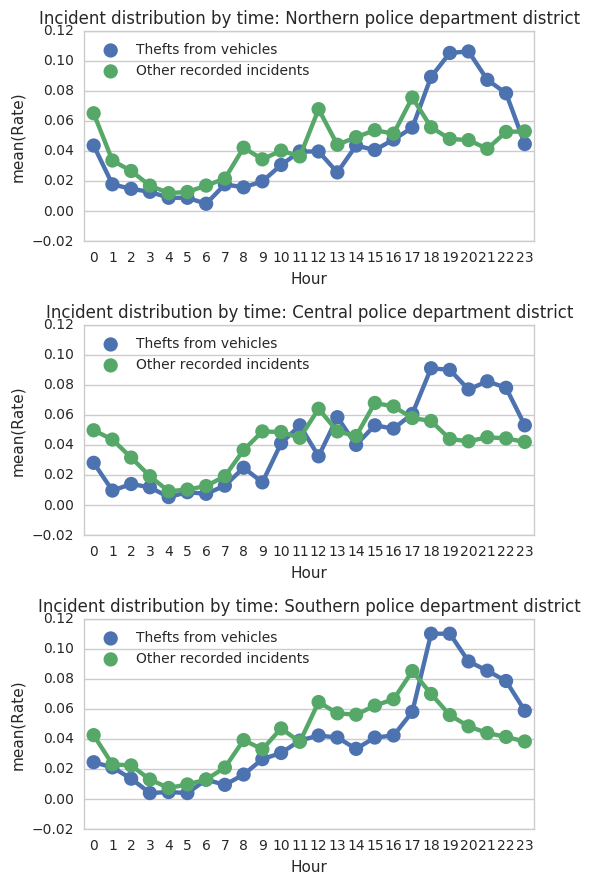

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(6, 9), sharey=True)
for i, district in enumerate(high_tfv_pd_districts):
    tfv_by_hour = tfv[tfv.PdDistrict == district].Hour.value_counts()
    other_by_hour = other[other.PdDistrict == district].Hour.value_counts()
    d = pd.concat([
            pd.DataFrame({
                'What': 'Thefts from vehicles',
                'Rate': tfv_by_hour / tfv_by_hour.sum(),
            }),
            pd.DataFrame({
                'What': 'Other recorded incidents',
                'Rate': other_by_hour / other_by_hour.sum(),
            }),
        ]).reset_index().rename(columns={'index': 'Hour'})
    ax = axes[i]
    sns.pointplot(x='Hour', y='Rate', hue='What', data=d, ax=ax)
    ax.set_title('Incident distribution by time: {} police department district'.format(district.title()))
    ax.legend(title=None, loc='upper left')
plt.tight_layout()
plt.show()

Clearly, thefts from vehicles are most common from 6 PM to 10 PM.

We have identified that, during Summer 2014, thefts from vehicles were most common in the north-eastern part of the city from 6 PM to 10 PM.